# Generali challenge 21: data exploration train vs validation
Confronto grafico tra dataset di train e di test. I grafici, proposti a due a due, sono strutturati come segue:
- il **primo grafico** rappresenta sempre il **train set**
- il **secondo grafico** rappresenta sempre il **test set**

In [3]:
cd C:\Users\Marco\Documents\GitHub\generali-challenge21\

C:\Users\Marco\Documents\GitHub\generali-challenge21


In [4]:
import pandas as pd
import numpy as np
from src.utils import fetch_data
from src.utils import drop_columns_without_variability
from src.utils import drop_artificial_columns
from src.utils import reverse_dummies_to_categories
import seaborn as sns
import matplotlib.pyplot as plt

## Struttura del dataset

In [5]:
train = fetch_data("train")
test = fetch_data("test")

Il dataset originale proposto da AXA contiene circa **1 milione di sinistri**, ciascuno di essi descritto da ben **391 variabili**.

In [7]:
from src.utils import preprocess_eda
trn = preprocess_eda(train)
vld = preprocess_eda(test)

ImportError: cannot import name 'prefixes_list' from 'config' (C:\ProgramData\Anaconda3\lib\site-packages\config.py)

Abbiamo eliminato le variabili per le quali è impossibile ricostruire un significato *umano* e raggruppato tra loro le variabili pertinenti a contesti simili. In questo modo otteniamo un dataset con un **numero di variabili più ragionevole: 60**.
Le informazioni a nostra disposizione sono elencate di seguito. Si noti che *non sono presenti informazioni relative alla data di accadimento del sinistro*.

## Distribuzione geografica dei sinistri

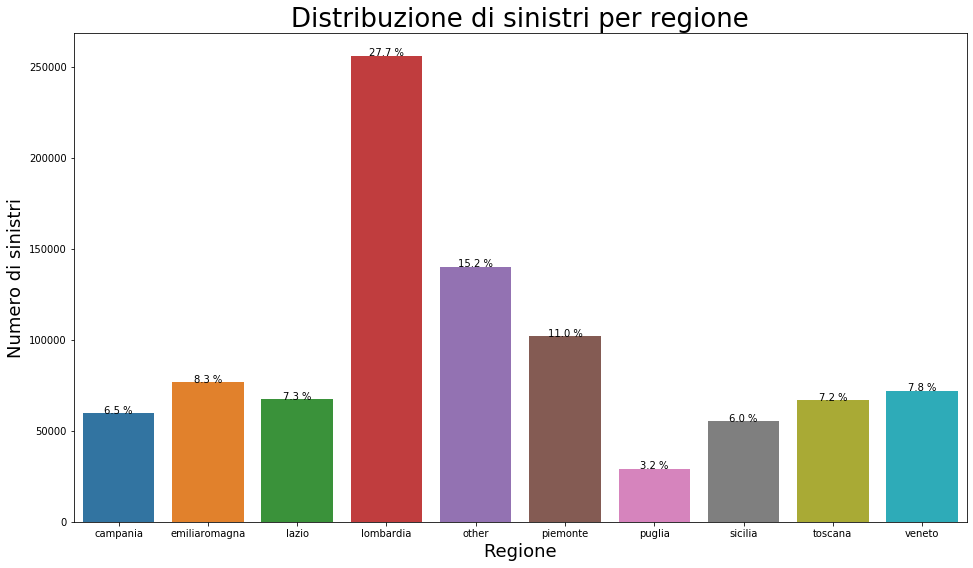

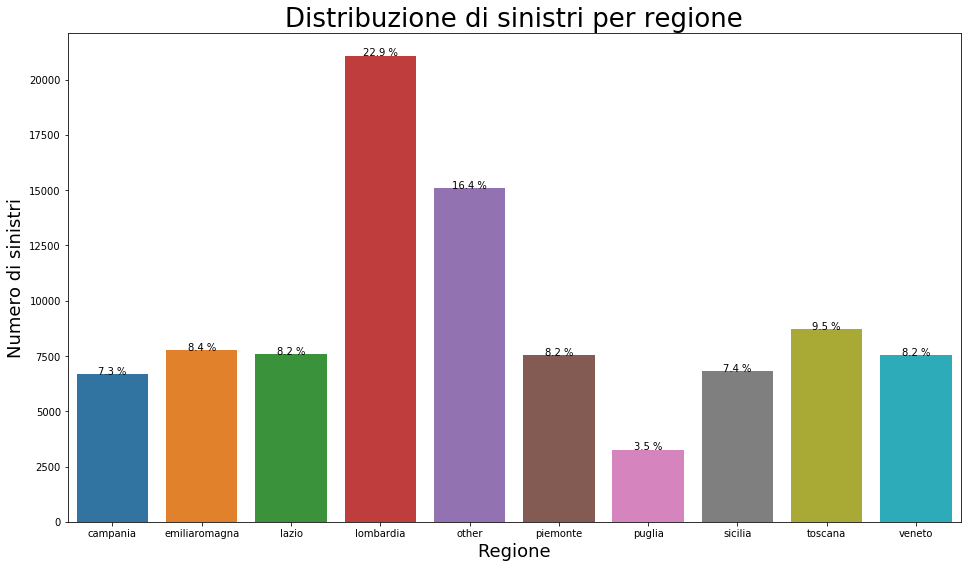

In [5]:
from plt_tools import sinistri_per_regione
sinistri_per_regione(trn)
sinistri_per_regione(vld)

I sinistri solitamente avvengono nella stessa regione in cui è stata aperta la polizza?

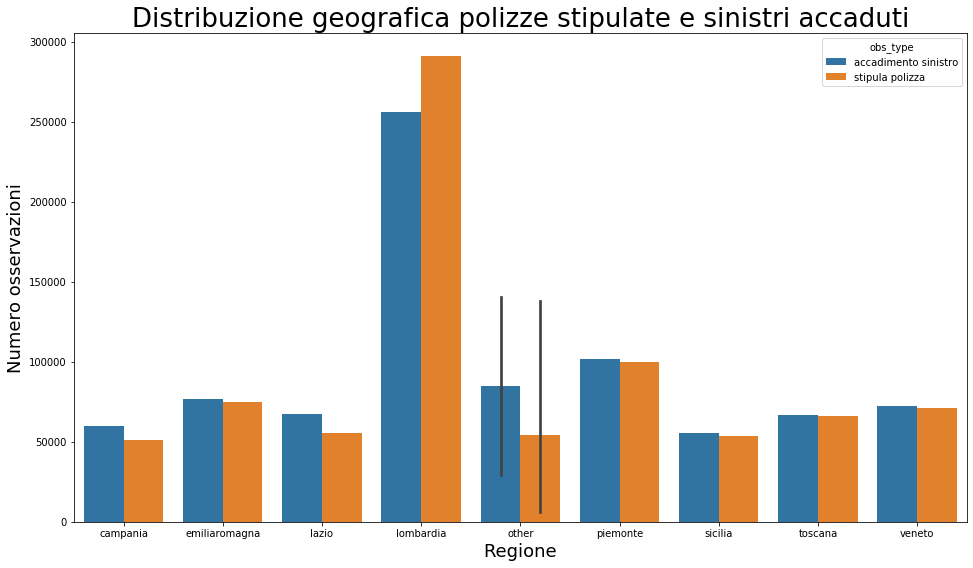

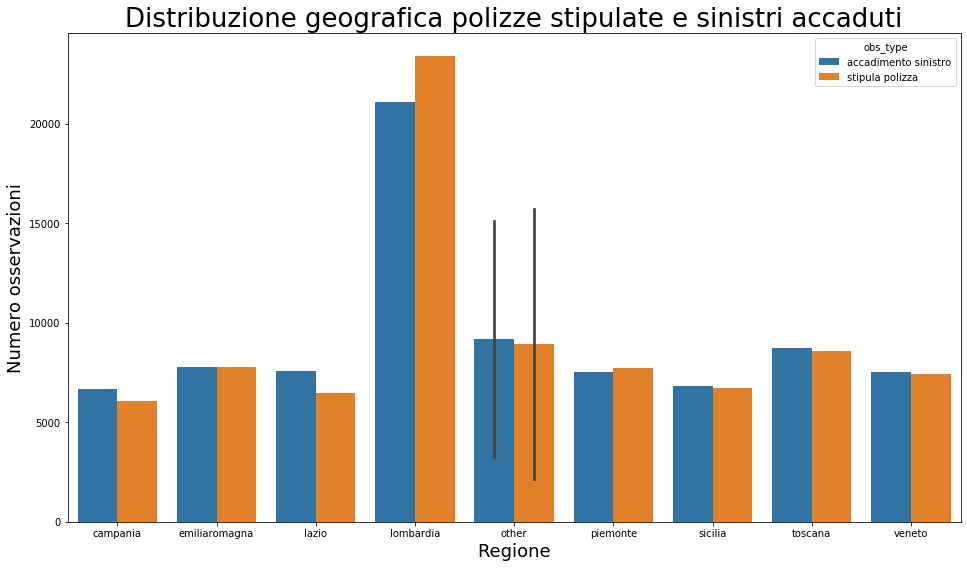

In [6]:
from plt_tools import sinistri_polizze_per_regione
sinistri_polizze_per_regione(trn)
sinistri_polizze_per_regione(vld)

## Analisi variabili temporali
Abbiamo a disposizione una collezione di variabili temporali relative alla distanza misurata in giorni tra:
- avvenimento sinistro e notifica sinistro
- avvenimento sinistro e inizio polizza
- avvenimento sinistro e fine polizza
- età dell'assicurato
- età della controparte

### Distanza temporale tra avvenimento sinistro e notifica sinistro

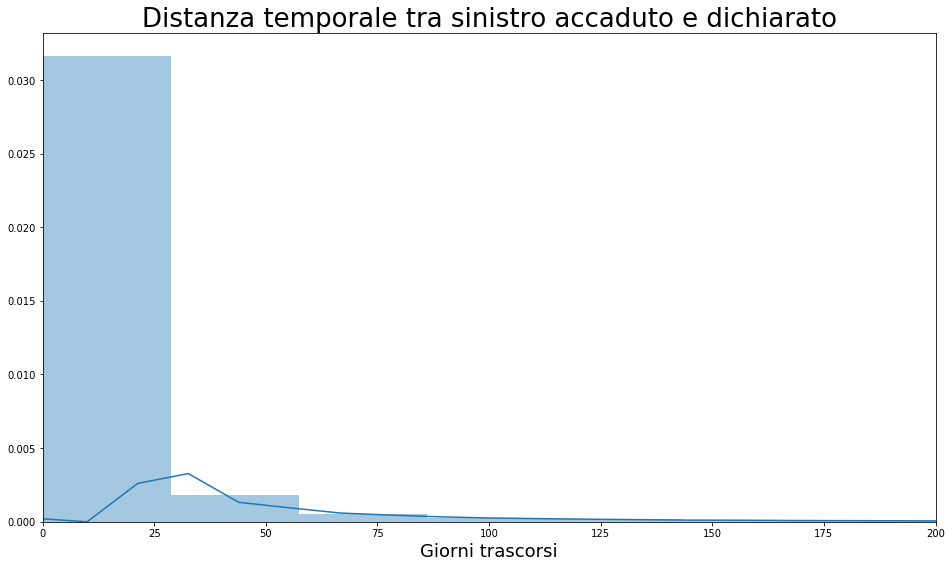

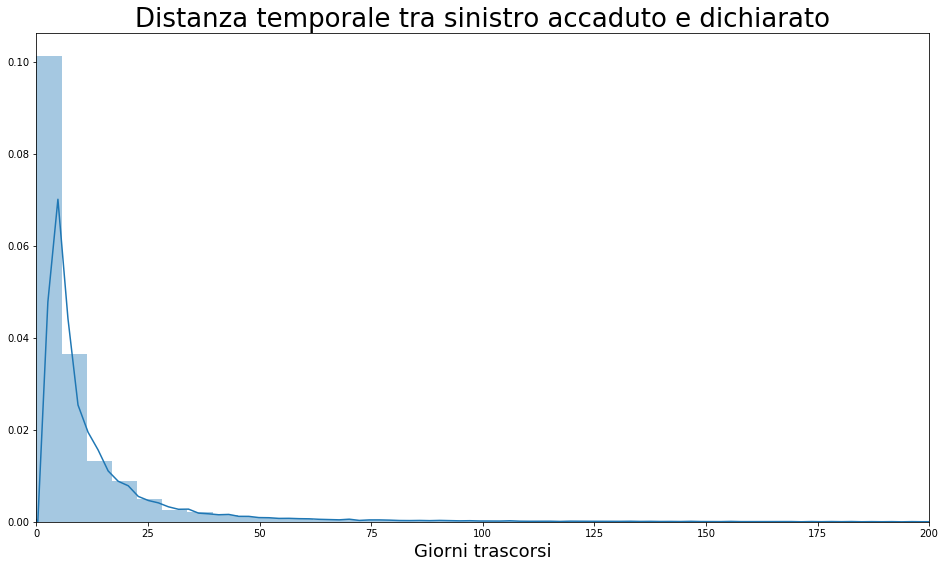

In [7]:
from plt_tools import distanza_temporale_accaduto_dichiarato
distanza_temporale_accaduto_dichiarato(trn,False)
distanza_temporale_accaduto_dichiarato(vld,False)

### Distanza temporale tra apertura polizza e dichiarazione sinistro
Eliminiamo dal nostro dataset i case anomali in cui il sinistro risulta dichiarato prima della apertura della polizza (circa 6 su mille). Ci troviamo di fronte alle seguenti distribuzioni:

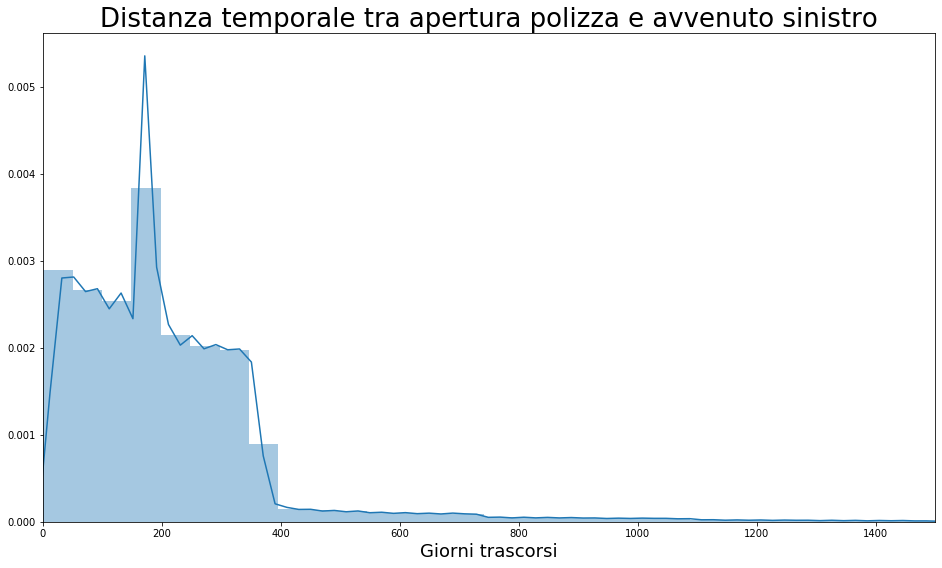

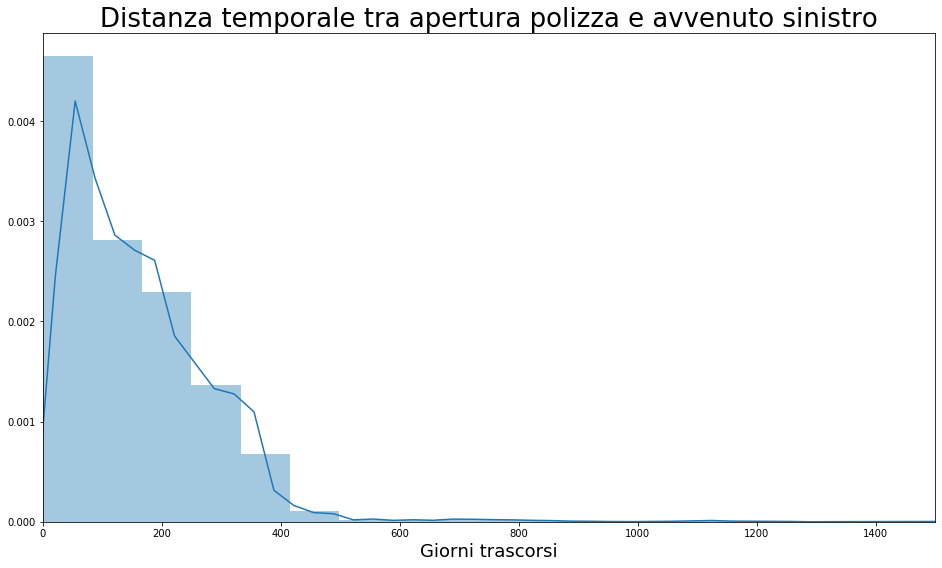

In [8]:
from plt_tools import distanza_temporale_apertura_sinistro
distanza_temporale_apertura_sinistro(trn, False)
distanza_temporale_apertura_sinistro(vld, False)

### Distanza temporale tra dichiarazione sinistro e fine polizza
Anche in questo caso, eliminiamo le osservazioni anomale in cui il sinistro risulta segnalato dopo la scadenza della polizza (circa 7 su mille)

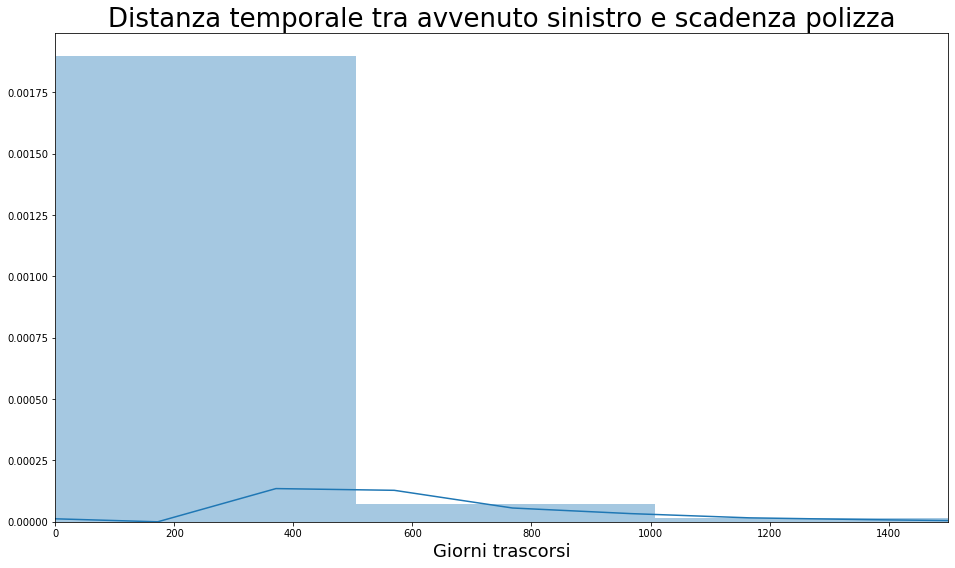

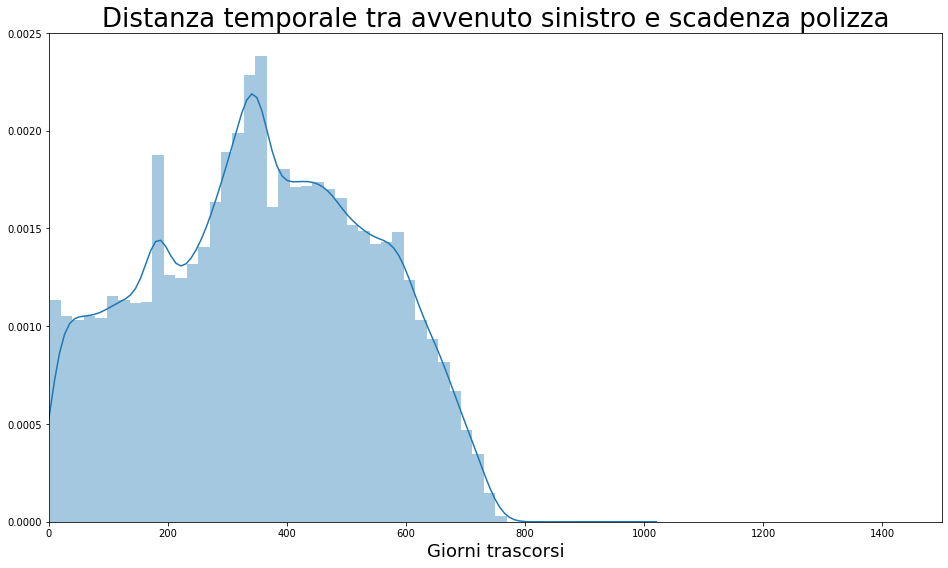

In [9]:
from plt_tools import distanza_temporale_chiusura_sinistro
distanza_temporale_chiusura_sinistro(trn, False)
distanza_temporale_chiusura_sinistro(vld, False)

Analizzando la distanza temporale tra accadimento sinistro e apertura / chiusura polizza, non sembra vi sia una netta distinzione tra le casistiche di sinistri leciti e frodi.

### Età di assicurato e controparte

Età di assicurato e controparte sono tra loro molto simili. Osserviamolo anche graficamente:

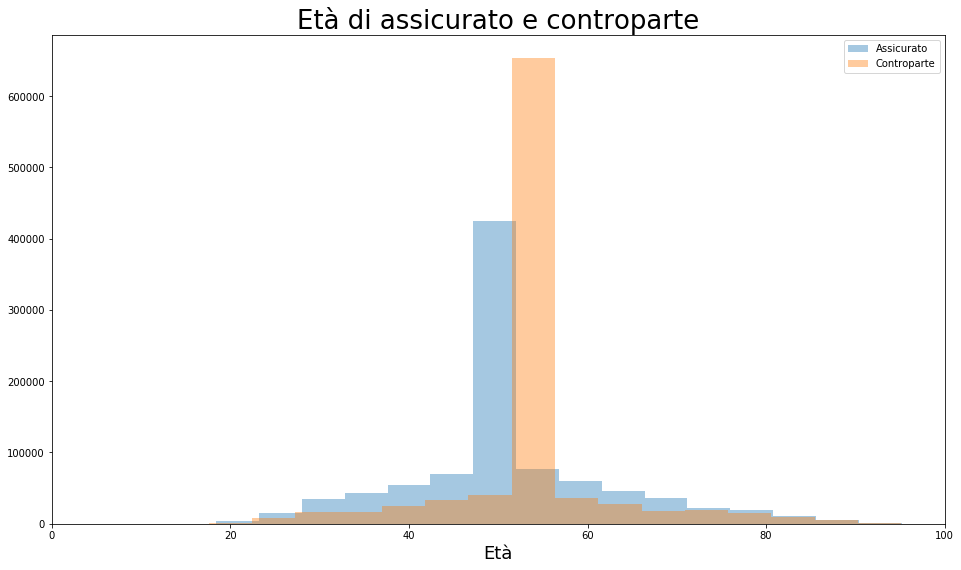

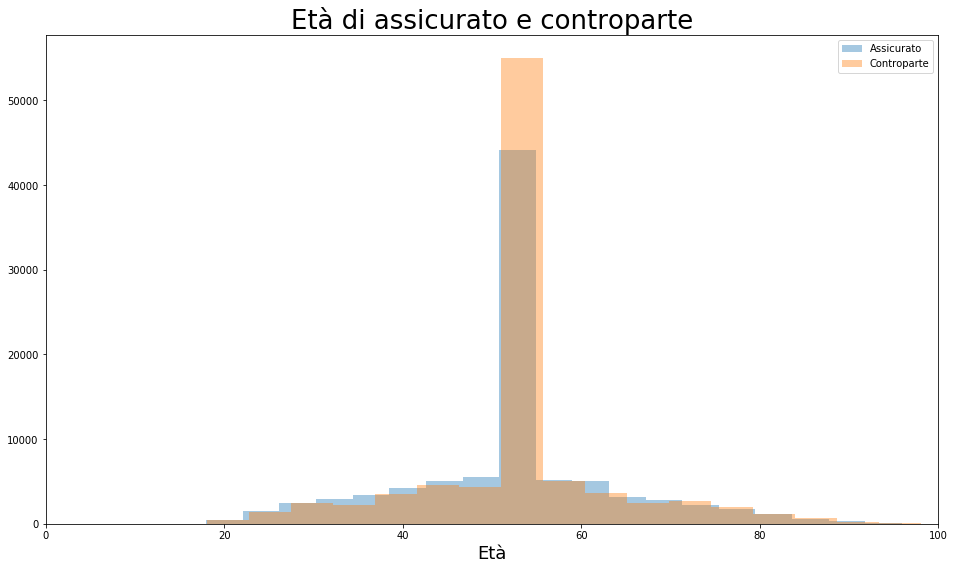

In [10]:
from plt_tools import eta_assicurato_controparte
eta_assicurato_controparte(trn)
eta_assicurato_controparte(vld)

Il train set sembra sfasato un po' a caso, tipo che hanno calcolato l'età dell'assicurato male. Proviamo a ribilanciarlo?

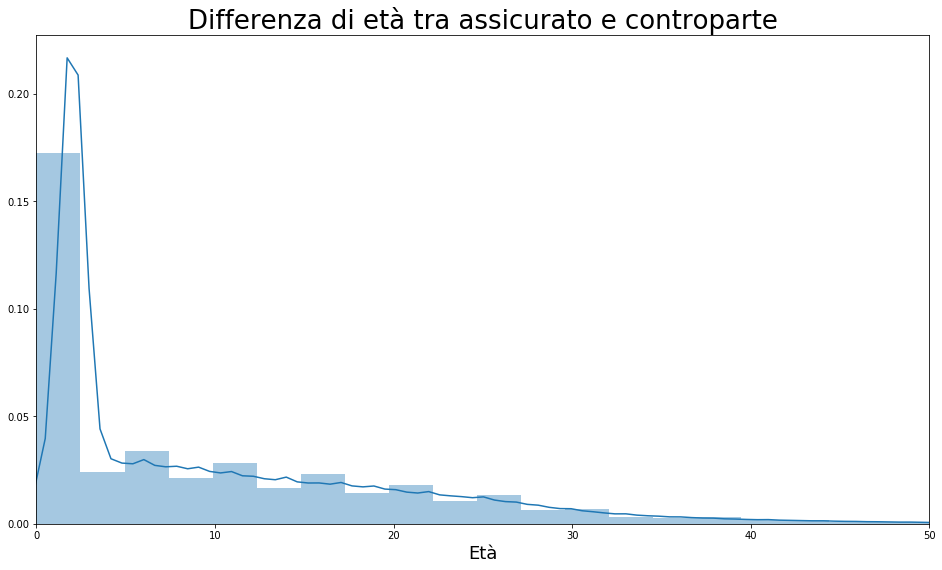

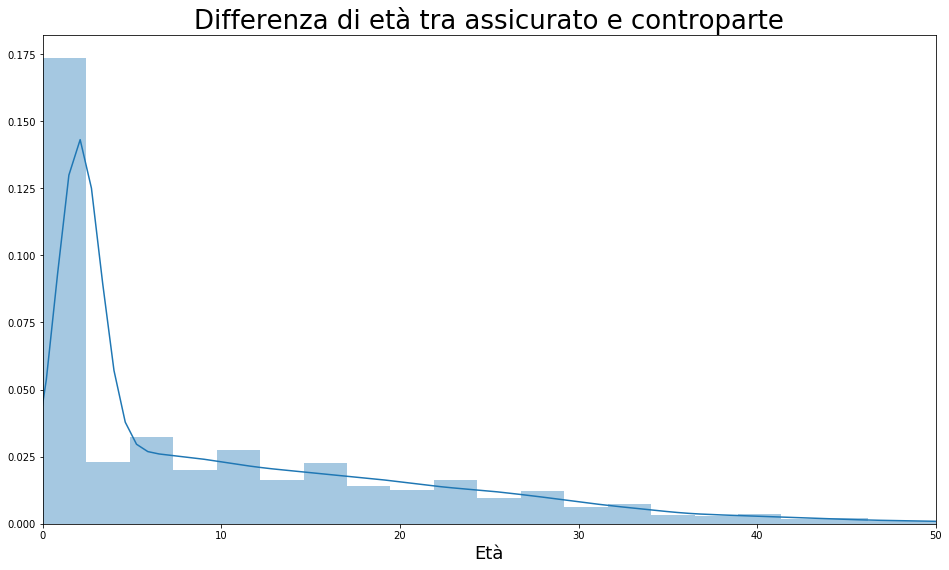

In [11]:
from plt_tools import differenza_eta_assicurato_controparte
differenza_eta_assicurato_controparte(trn, False)
differenza_eta_assicurato_controparte(vld, False)

Tra i sinistri fraudolenti c'è una maggiore concentrazione di assicurato e controparte con 0 o 1 anno di differenza: evidentemente coetanei che si sono messi d'accordo.

## Presenza di testimoni

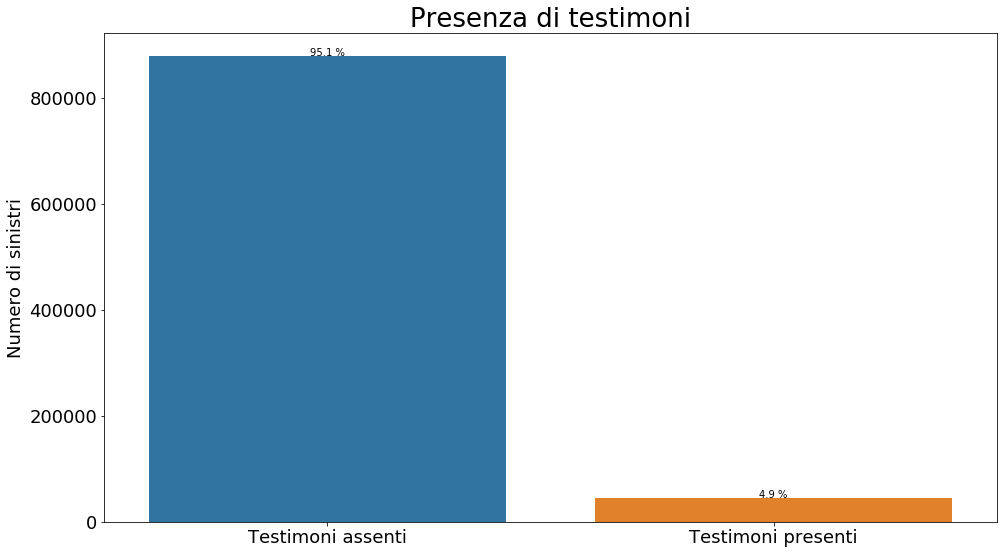

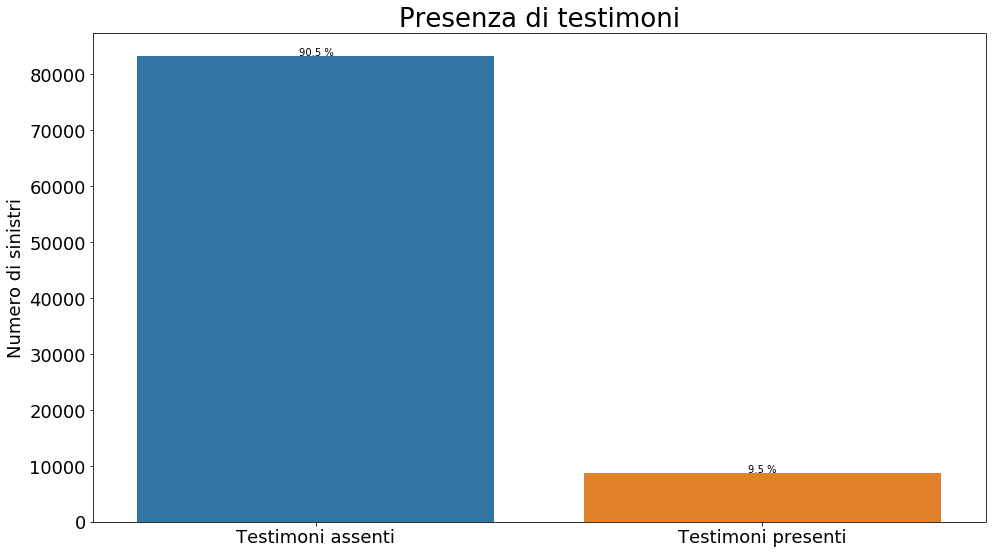

In [12]:
from plt_tools import presenza_testimoni
presenza_testimoni(trn)
presenza_testimoni(vld)

## Veicolo coinvolto in furto

In [13]:
print(trn.is_thief_known.value_counts())
print(vld.is_thief_known.value_counts())

False    924672
True         12
Name: is_thief_known, dtype: int64
False    92056
True         5
Name: is_thief_known, dtype: int64


Questa la droppiamo Marco, che dici?

## Distanza geografica da luogo di accadimento

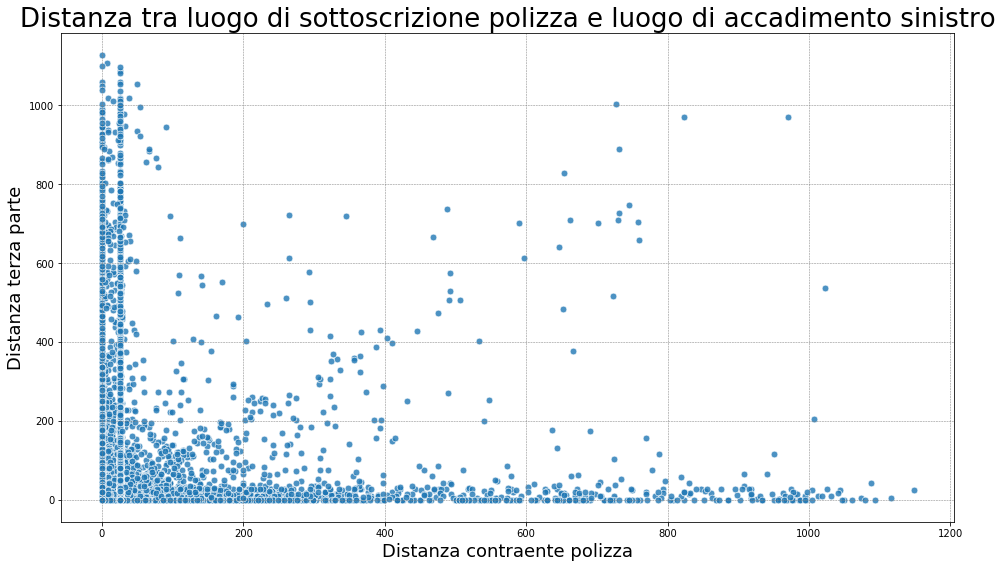

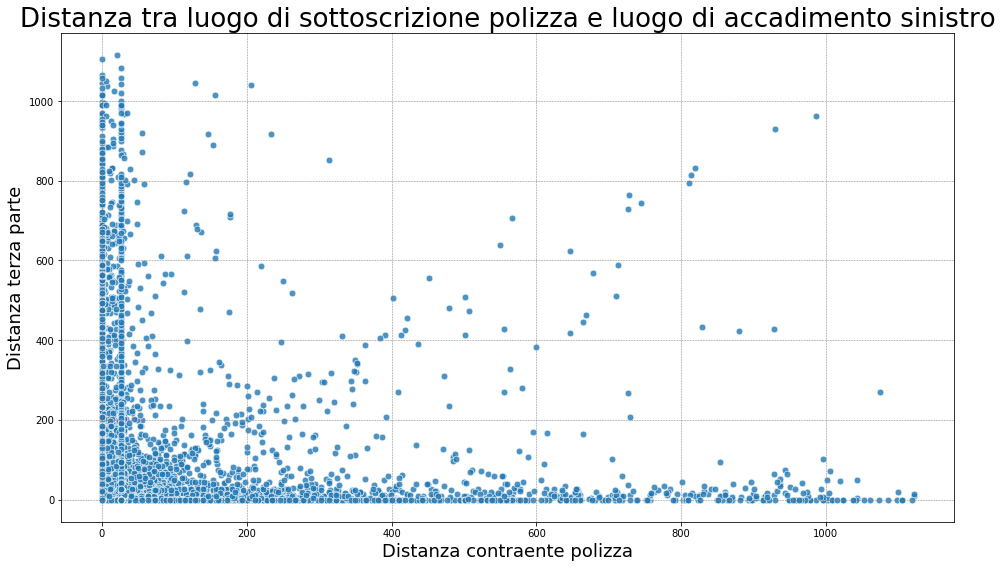

In [14]:
from plt_tools import distanza_contraente_terzaparte_generale
distanza_contraente_terzaparte_generale(trn,50000)
distanza_contraente_terzaparte_generale(vld,50000)

## Compilazione della constatazione amichevole
*La sigla per costatazione amichevole è CID, cioè **convenzione per l'indennizzo diretto**.*

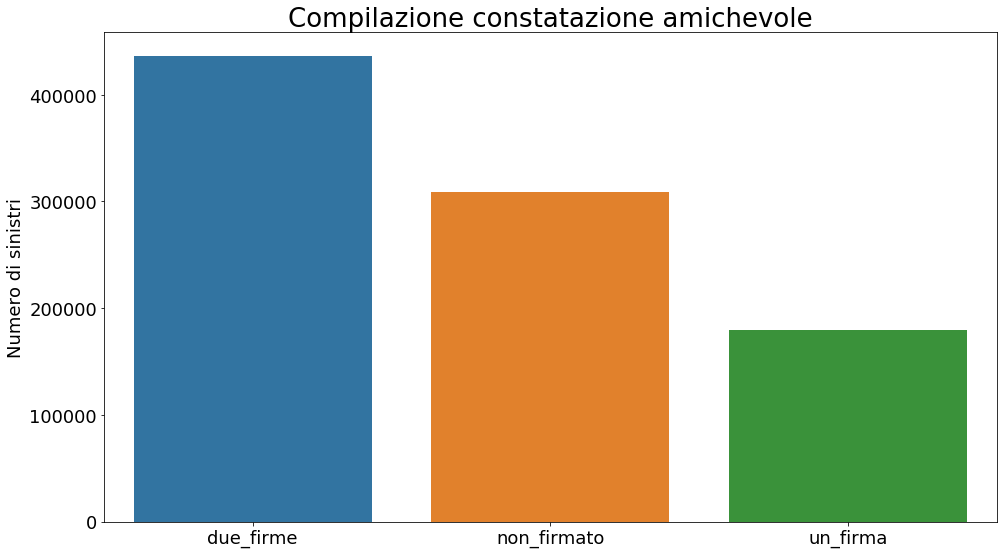

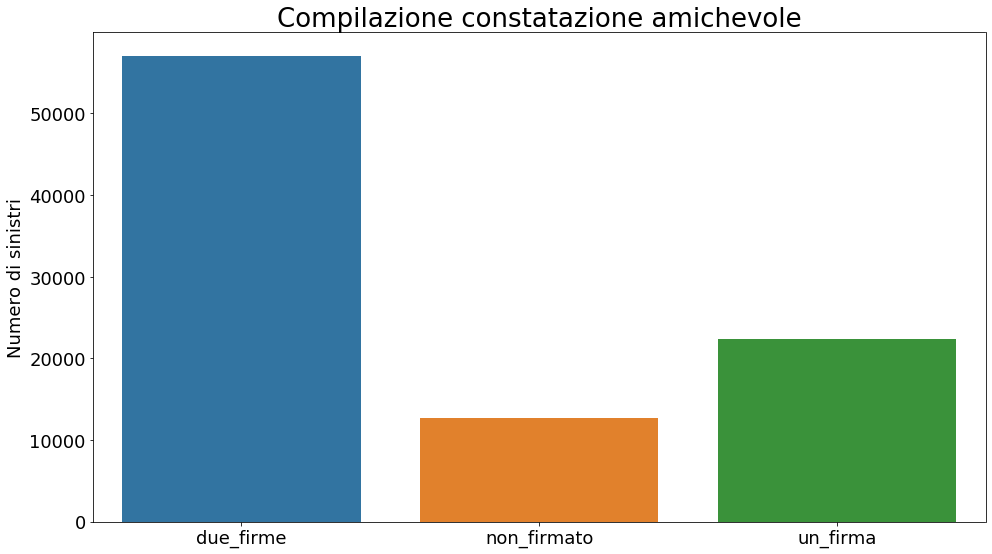

In [15]:
from plt_tools import compilazione_cid
compilazione_cid(trn, split_frodi=False)
compilazione_cid(vld, split_frodi=False)

Strano!

## Intervento della polizia

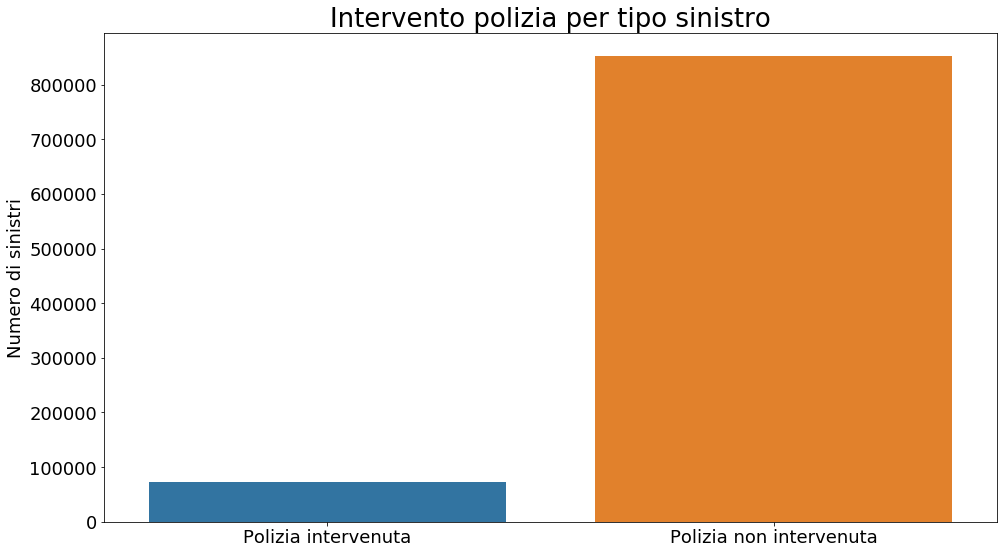

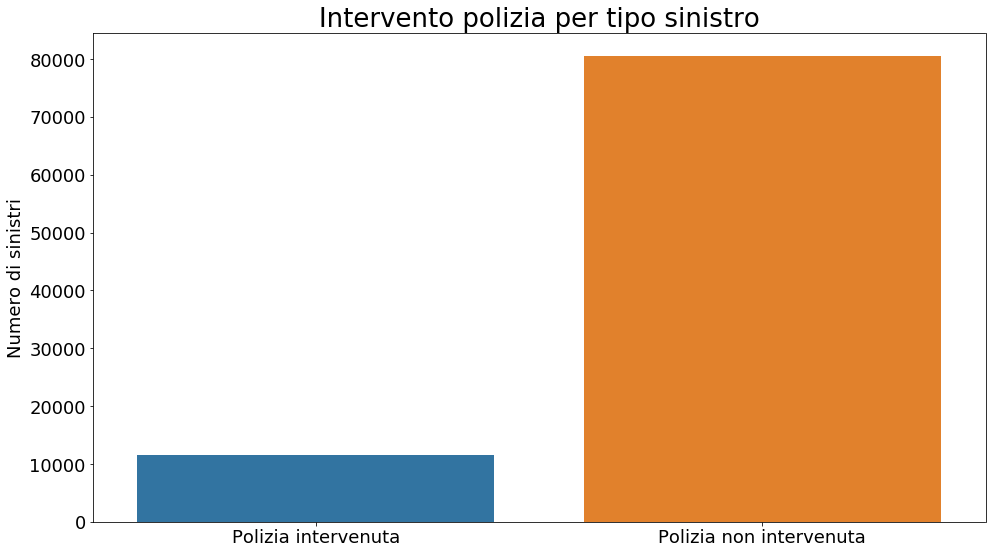

In [16]:
from plt_tools import intervento_polizia
intervento_polizia(trn, split_frodi=False)
intervento_polizia(vld, split_frodi=False)

Nei sinistri illeciti si vede un intervento della polizia quasi impercettibilmente inferiore. Non vi è comunque evidenza sufficiente a trarre conclusioni.

## La controparte è assicurata?

In [17]:
print(trn.tp__thirdparty_is_insured.value_counts())
print(vld.tp__thirdparty_is_insured.value_counts())

True     922327
False      2357
Name: tp__thirdparty_is_insured, dtype: int64
True     91945
False      116
Name: tp__thirdparty_is_insured, dtype: int64


## Sinistri con diverse descrizioni

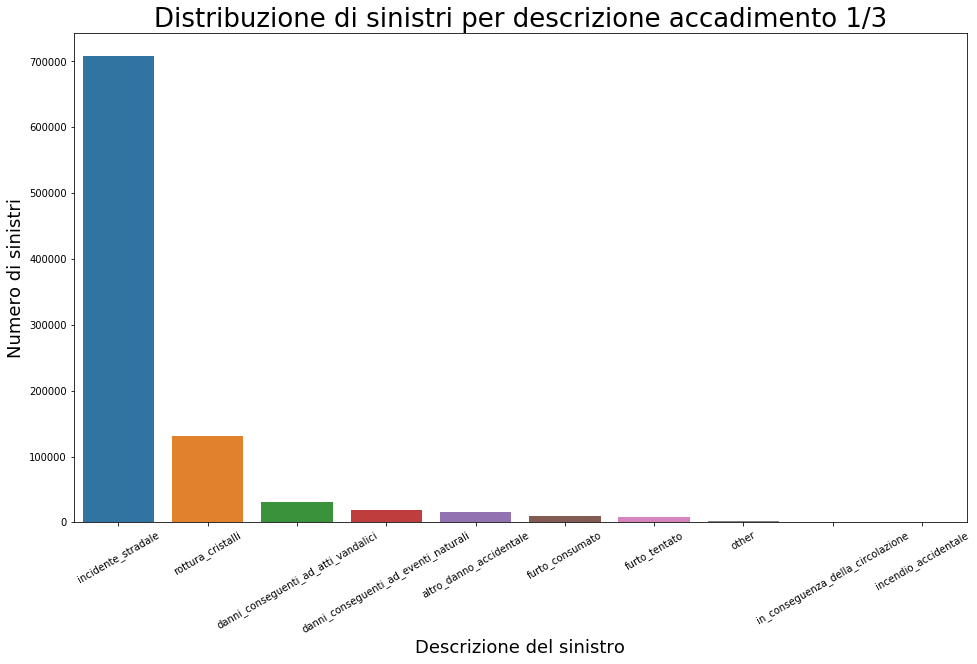

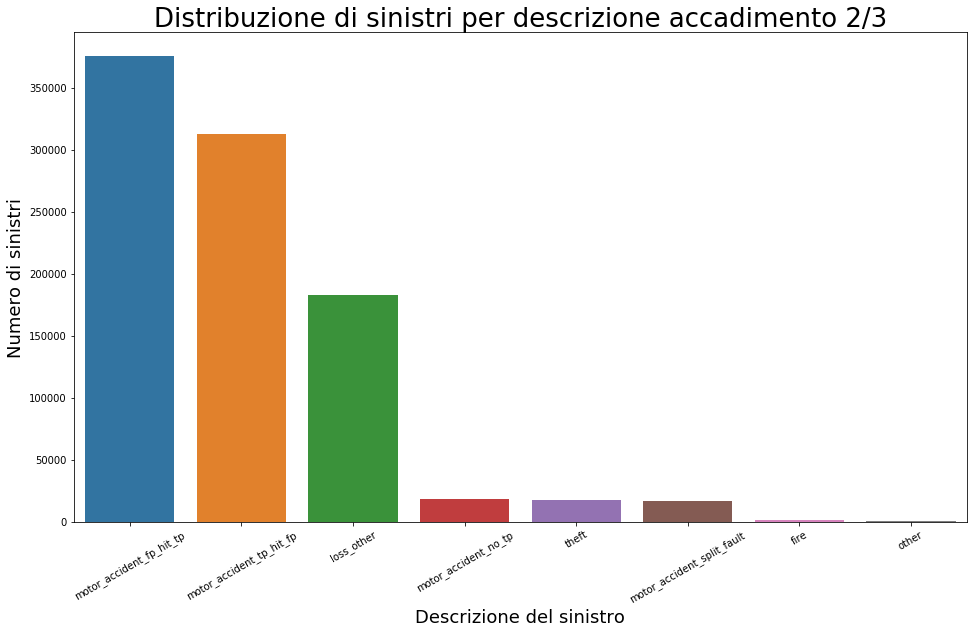

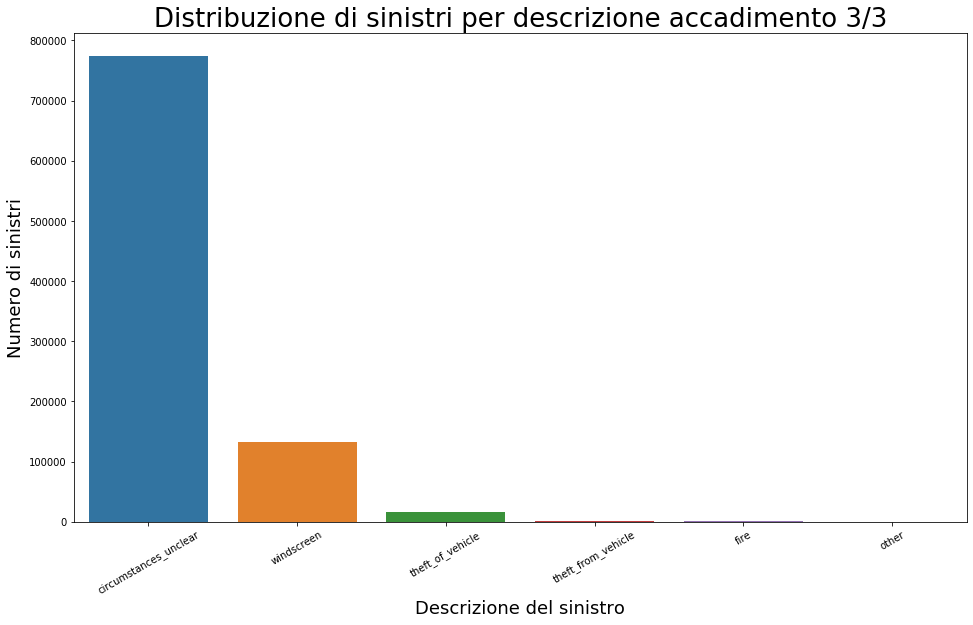

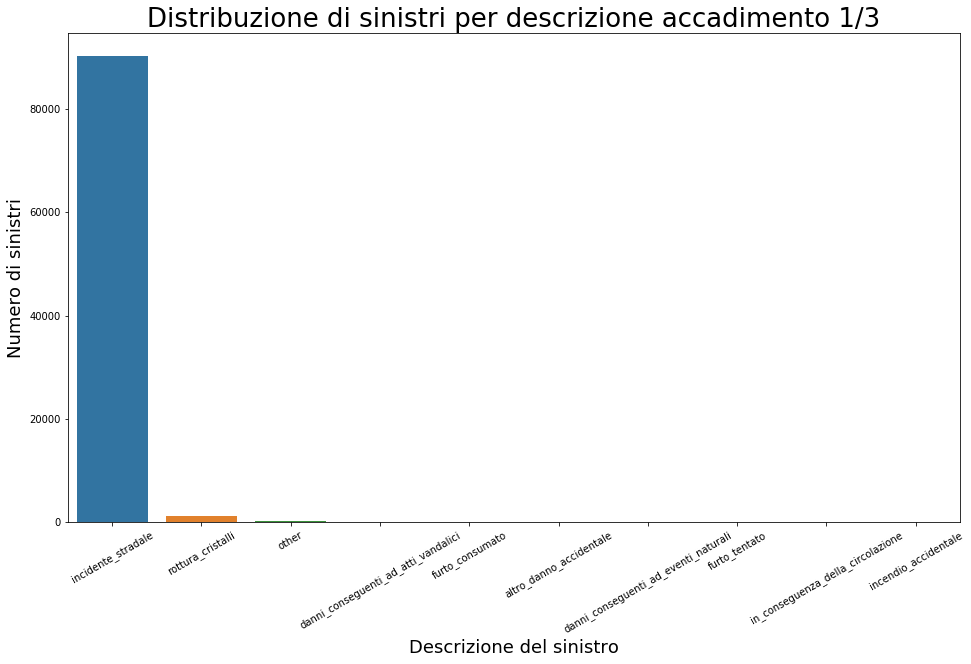

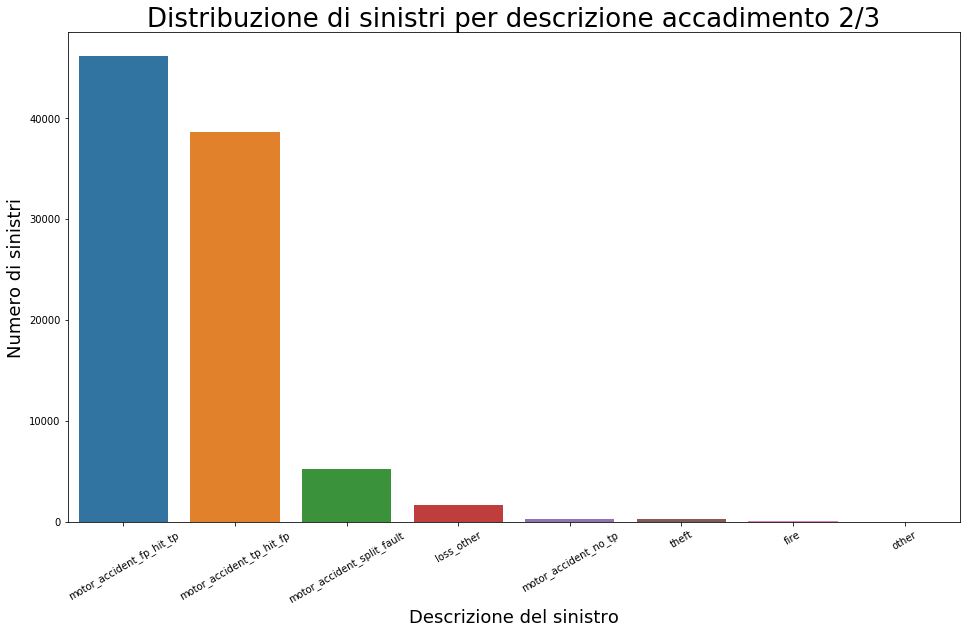

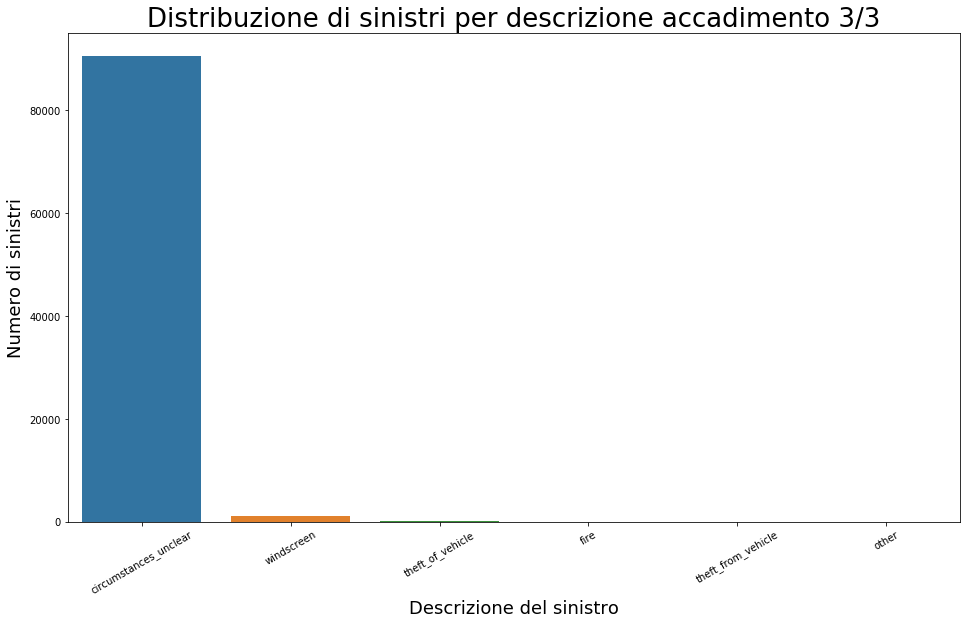

In [18]:
from plt_tools import sinistri_per_claim
sinistri_per_claim(trn)
sinistri_per_claim(vld)

## Tipologia di tariffa

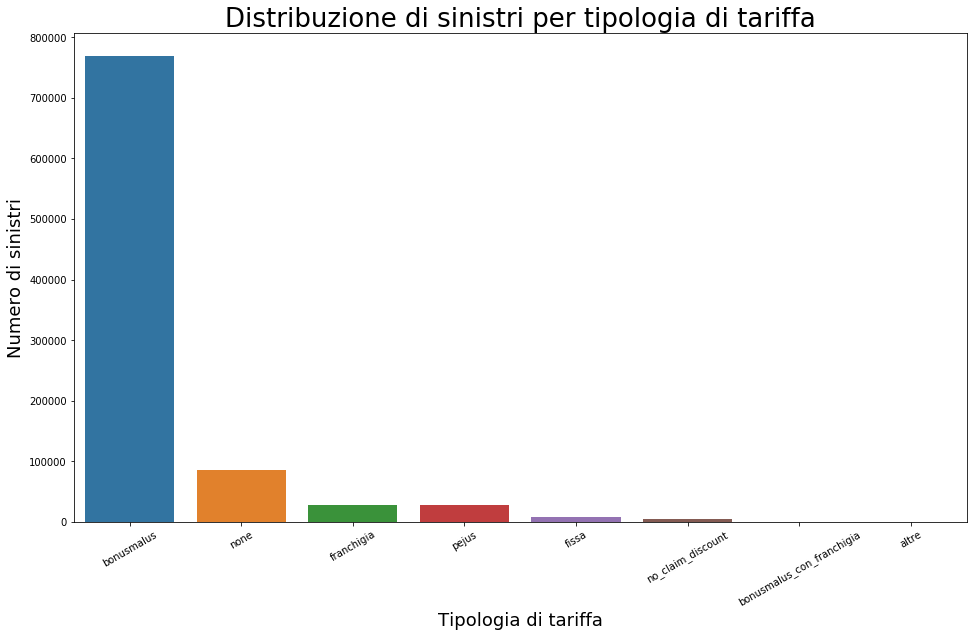

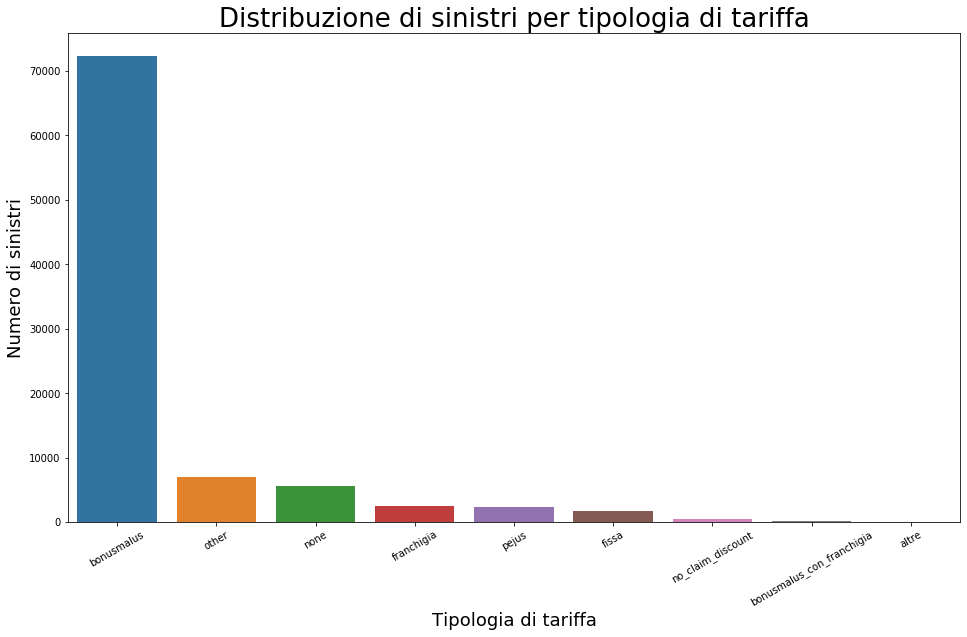

In [19]:
from plt_tools import tipologia_di_tariffa
tipologia_di_tariffa(trn,False)
tipologia_di_tariffa(vld,False)

## Tipologia di patente

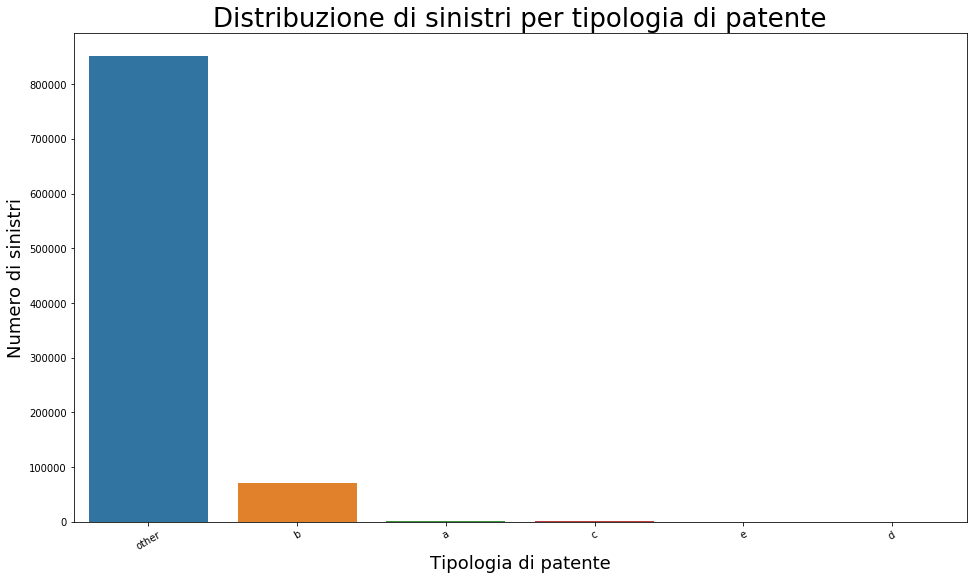

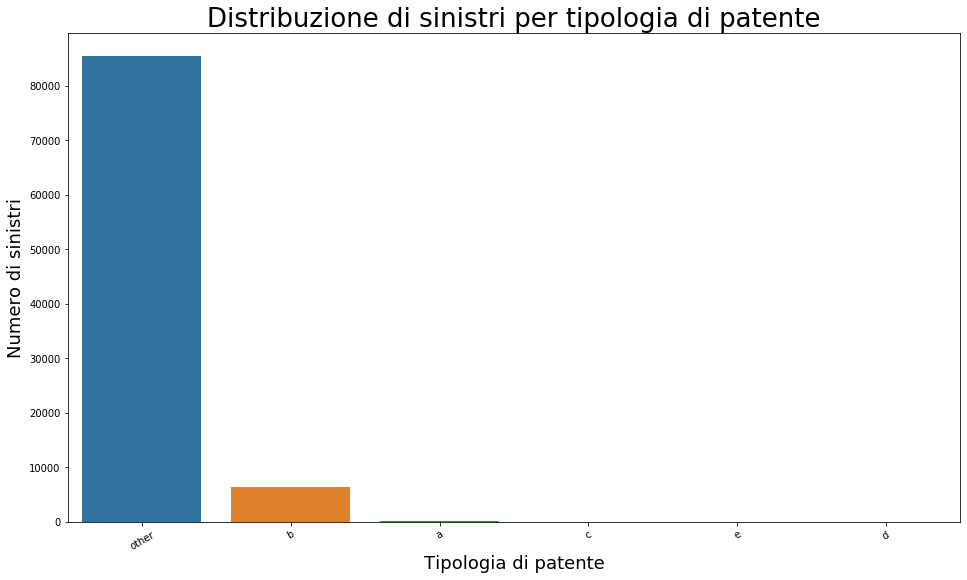

In [20]:
from plt_tools import tipologia_di_patente
tipologia_di_patente(trn, False)
tipologia_di_patente(vld, False)

## Commento iniziale - 11 Marzo 2020
Da questa analisi *univariata* e *bivariata* emerge una quasi sospetta carenza di evidenze distintive tra sinistri leciti e frodi: sembra quasi che i frodatori facciano uno sforzo per confondersi nella totalità dei sinistri. 

Tale sforzo risulta particolarmente evidente osservando la distribuzione di descrizione dei sinistri e di differenze di età tra assicurato e terza parte: nel caso delle frodi, si osserva sempre un maggior raggruppamente verso il valore più frequente.

I frodatori non sanno che gli algoritmi di machine learning vanno ben oltre analisi univariata e bivariata e sono in grado di combinare fra loro gli effetti di centinaia di variabili, identificando le tracce *statistiche* che l'attività criminale inevitabilmente lascia.

## Tipologia di veicoli coinvolti

### Marca veicolo

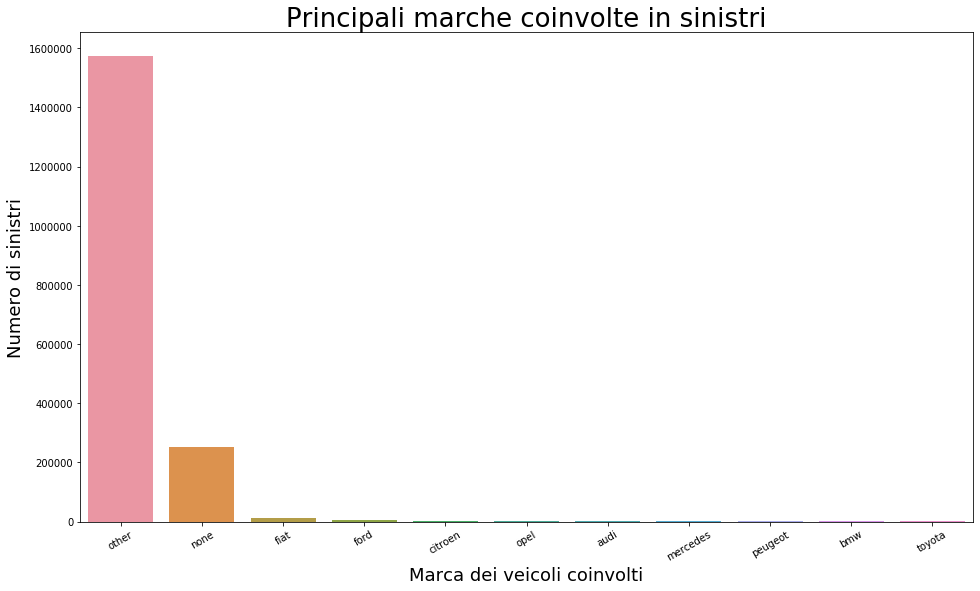

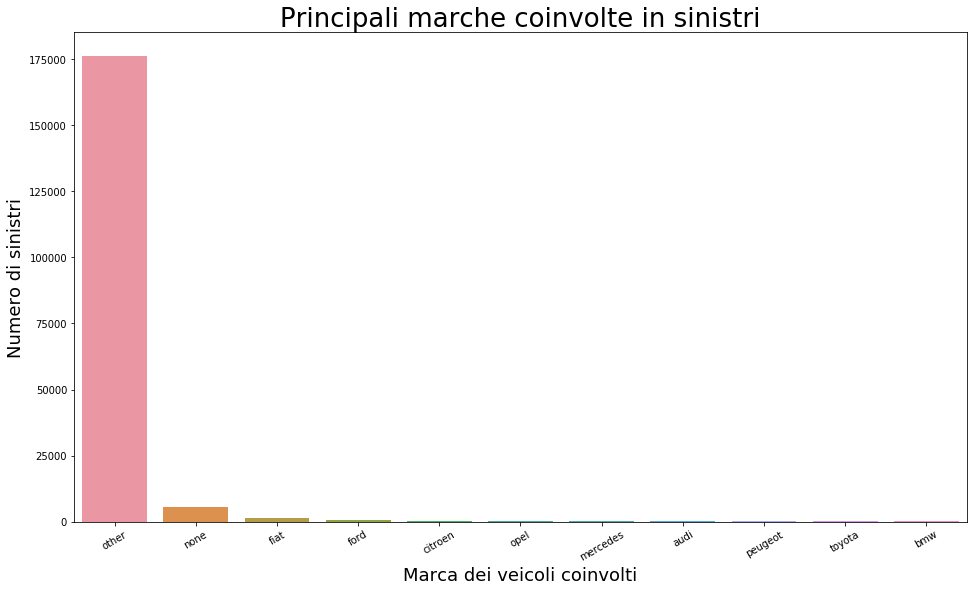

In [21]:
from plt_tools import marca_veicolo_generale
marca_veicolo_generale(trn,omit_noise=False,split_frodi=False)
marca_veicolo_generale(vld,omit_noise=False,split_frodi=False)

Come si vede, i dati non sono particolarmente puliti: quasi il 90 % di osservazioni vengono categorizzate come *other* o *none*. Vediamo cosa succede focalizzandoci sulle osservazioni valorizzate:

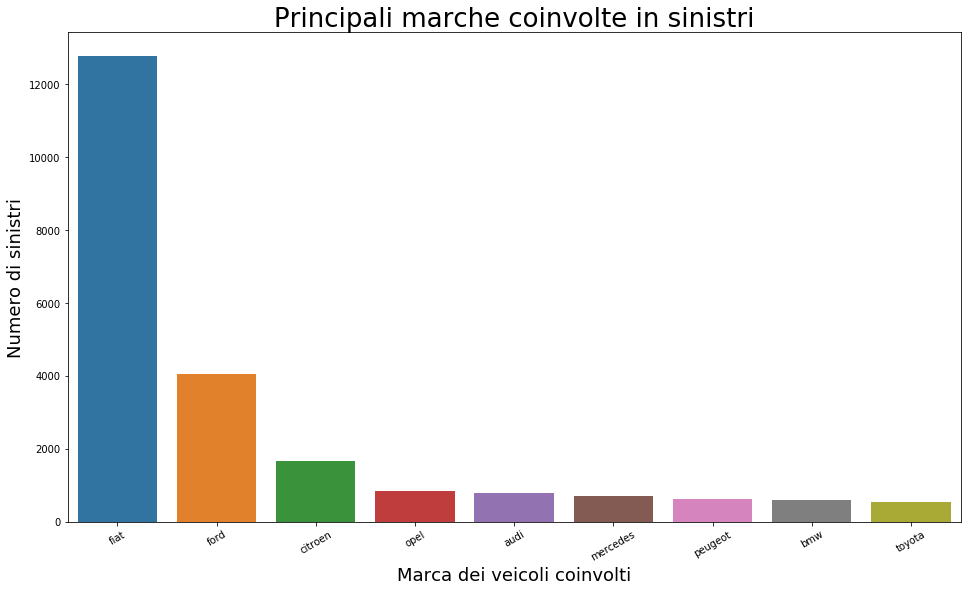

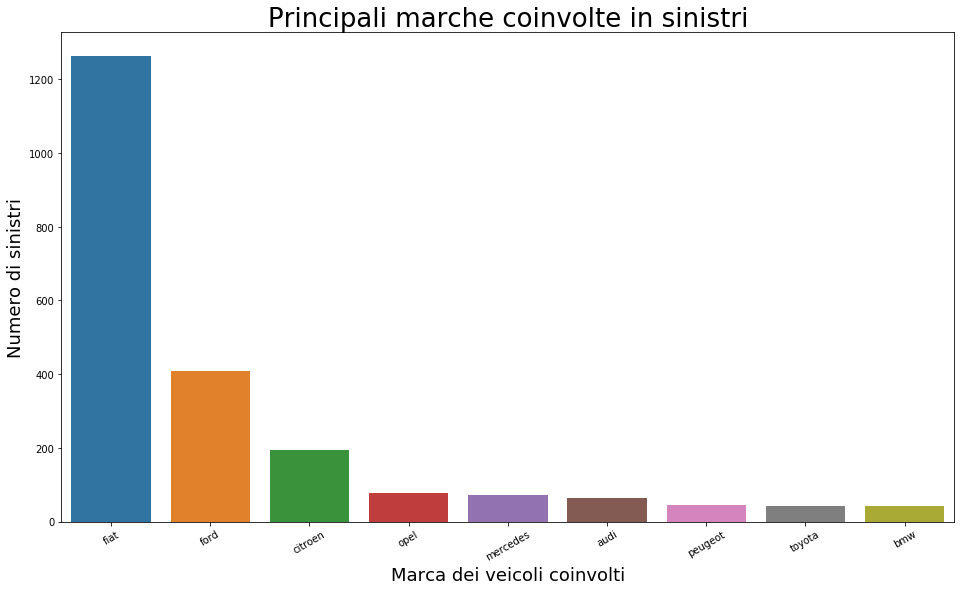

In [22]:
marca_veicolo_generale(trn,omit_noise=True,split_frodi=False)
marca_veicolo_generale(vld,omit_noise=True,split_frodi=False)

### Tipologia veicolo

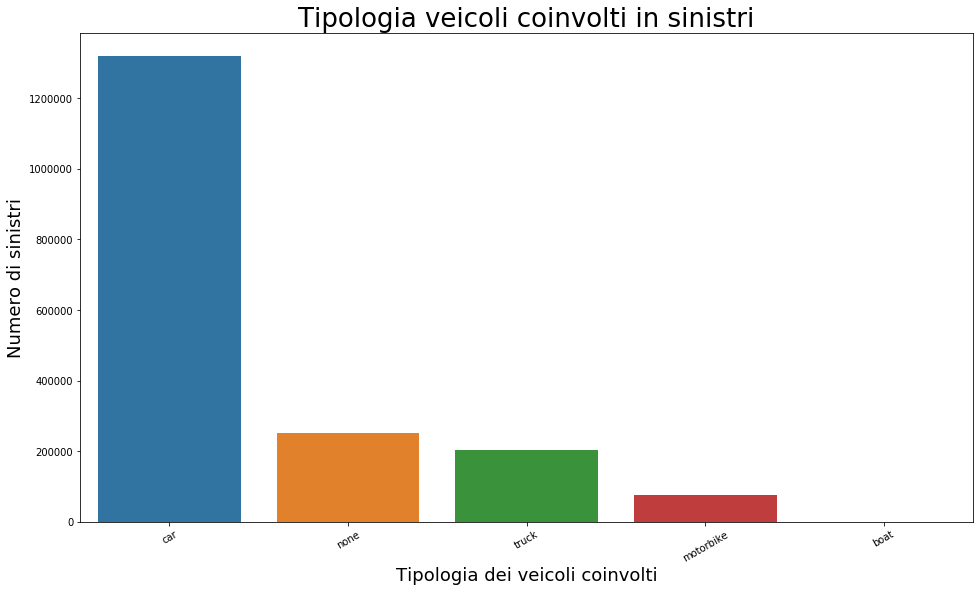

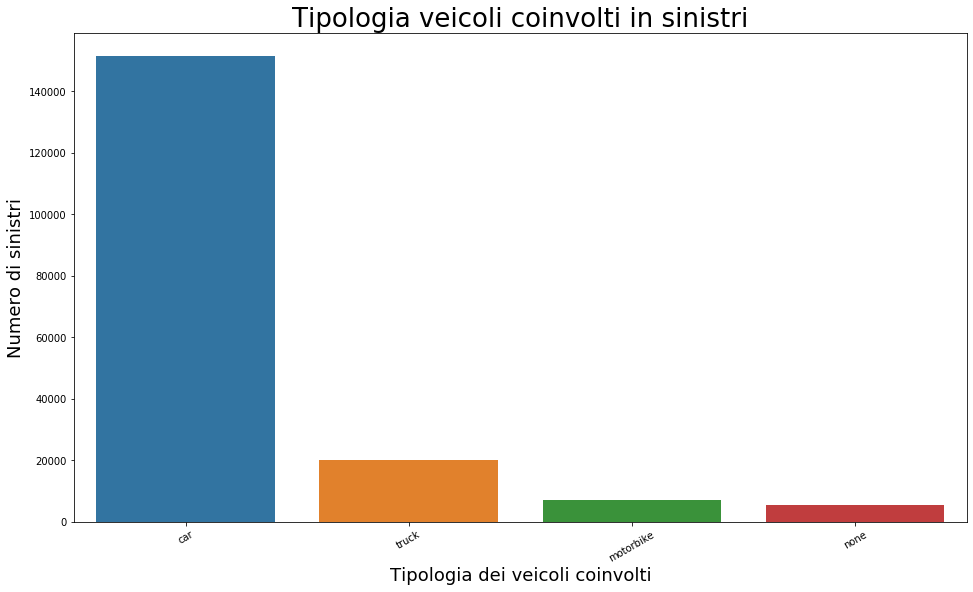

In [23]:
from plt_tools import tipologia_veicolo_generale
tipologia_veicolo_generale(trn, False, False)
tipologia_veicolo_generale(vld, False, False)

Interessante in questo caso vedere come i sinitri fraudolenti coinvolgano **motocicli** molto più spesso rispetto a sinistri leciti. Sorge un'altra domanda: quanto spesso sono coinvolte barche?

In **3 sinistri su un milione**, una barca è stata coinvolta come terza parte. @Marco togliamoli dal dataset va xD

## Complessità del sinistro

A ciascun sinistro associamo un punteggio che ne identifica la complessità, secondo le suegenti regole:
- punteggio di partenza: 0
- uscita polizia: +1
- presenza testimoni: +1
- veicolo contraente danneggiato: +1
- veicolo terza parte danneggiato: +1
- ulteriori veicoli danneggiati: +1

In questo modo, un sinistro con punteggio 0 sarà estremamente semplice (nessun danno a veicoli, niente testimoni nè polizia) mentre un sinistro con punteggio 4 o 5 sará decisamente complesso (danni a più di un veicolo, presenza testimoni e / o polizia).

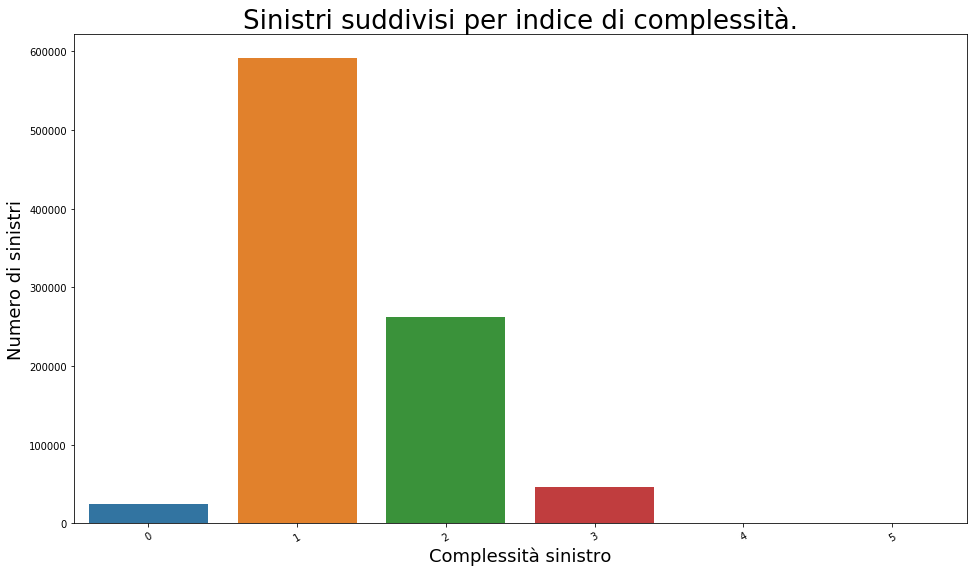

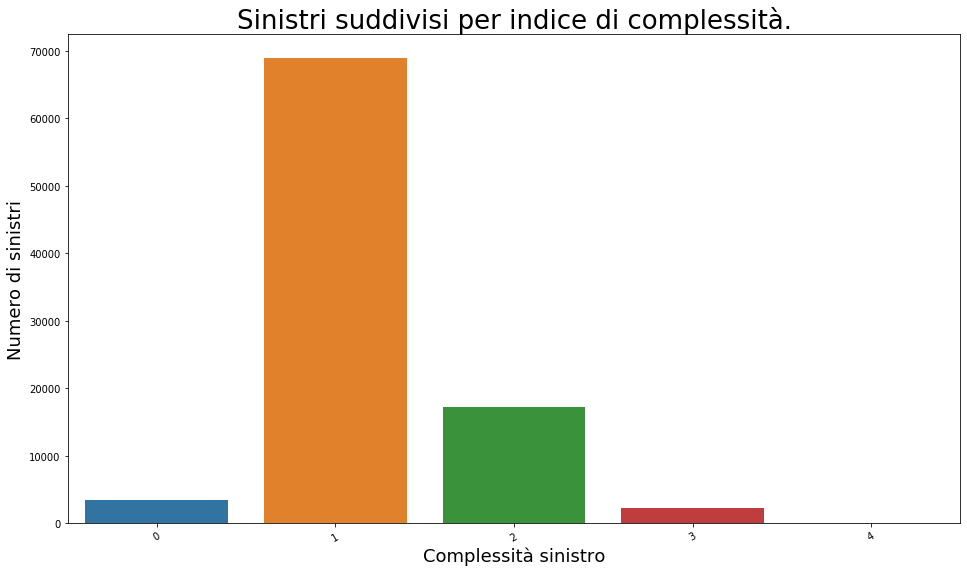

In [28]:
from src.utils import calcola_complessita_sinistro
trn = calcola_complessita_sinistro(trn)
vld = calcola_complessita_sinistro(vld)
from plt_tools import complessita_sinistro
complessita_sinistro(trn)
complessita_sinistro(vld)